# First Homework!
### In your groups, develop a strategy to play Rock Paper Scissors (RPS) in an iterative arena. Your strategy will be competing against other groups' contributions, as well as my own! 

### You can assume that there will be many copies of your strategy in the population at any given time. Also, the number of iterations played will range between 10 and 100. 


I've provided the framework you'll need to develop and test your strategy. Let's walk through the details of it here:

## Here we have a strategy that always plays Rock
If you need a quick refresher about how classes work in Python, check out the lesson in our class github repository [here](https://github.com/zamanlh/EvolutionInSilico_Current/blob/master/Lessons/0_PythonIntro/07_Classes.ipynb). 

### We'll keep track of a few things in a RPS strategy object (this is what we call an instance of a class in Object-Oriented Programing -- which is also just a fancy way of saying when we program using objects).

The self that you see all over the place is just a way of telling python that each instance of the RockOnly class will have variables that it owns and that are unique to that individual object. You can see this particularly well in the `__init__` function. The underscores means this is a private function that you can't call yourself, but is used internally. In this case, `init` is used when a new object of this type is created. 

We'll keep track of the set of moves an individual can play, here it is just `['R', 'P', 'S']` since we're limiting ourselves to the classic Rock Paper Scissors game. We'll also store the throws this individual has made (`self.my_history`), as well as the throws its competitor made in case we want to use those to pick the next throw in the future (`self.partner_history`). And finally, we'll also record the fitness of the individual.

There are a few helper functions here as well like `reset` which just clears out the organisms memory and fitness so we can start a new competition, and `reproduce` that returns a new instance of the strategy so we can easily population the world with winning strategies. 

### But the main part, and the bit you'll mostly be changing, is the `play` function!
Here we're simply always throwing the 'R' move, which is then appended to the history variable to keep track of this individual's past moves. 

The `play` function can be as complex as you like, and remember that you'll be compeiting with other groups' strategies, as well as your own strategy!

In [22]:
import numpy as np

class RockOnly:
    def __init__(self):
        self.name = "Rock Thrower"
        self.moves = ['R', 'P', 'S']
        self.my_history = []
        self.partner_history = []
        self.fitness = 0
        
    def reset(self):
        self.my_history = []
        self.partner_history = []
        self.fitness = 0
        
    def play(self):
        my_move = 'R'
        self.my_history.append(my_move)
        return(my_move)
        
    def update_partner_history(self, their_move):
        self.partner_history.append(their_move)
    
    def replicate(self):
        offspring = type(self)()
        return(offspring)


## Just to illustrate the competition arena, I'll make `PaperOnly` and `ScissorsOnly` strategies as well.

In [7]:

class PaperOnly:
    def __init__(self):
        self.name = "Paper Thrower"
        self.moves = ['R', 'P', 'S']
        self.my_history = []
        self.partner_history = []
        self.fitness = 0
        
    def reset(self):
        self.my_history = []
        self.partner_history = []
        self.fitness = 0
        
    def play(self):
        my_move = 'P'
        self.my_history.append(my_move)
        return(my_move)
        
    def update_partner_history(self, their_move):
        self.partner_history.append(their_move)
    
    def replicate(self):
        offspring = type(self)()
        return(offspring)

class ScissorsOnly:
    def __init__(self):
        self.name = "Scissors Thrower"
        self.moves = ['R', 'P', 'S']
        self.my_history = []
        self.partner_history = []
        self.fitness = 0
        
    def reset(self):
        self.my_history = []
        self.partner_history = []
        self.fitness = 0
        
    def play(self):
        my_move = 'S'
        self.my_history.append(my_move)
        return(my_move)
        
    def update_partner_history(self, their_move):
        self.partner_history.append(their_move)
    
    def replicate(self):
        offspring = type(self)()
        return(offspring)

# Here is the code for the RPS Arena! 
### You shouldn't have to change any of this, but you should use it to design and test your strategies!
Essentially, all this is doing is creating a population of different strategies that are provided, and competing every individual in the population against every other individual, and then choosing which individuals replicate proportional to their payoffs. 


I'll add a few comments within the code to help make sense of what this is doing.

In [16]:
from collections import Counter
import random 

class RPSPopulation:
    def __init__(self, population_size = 100):
        #This is the RPS payoff matrix we worked out in class.
        #I've made it as dictionary so I can quickly lookup
        #rewards for a given pair of throws.
        self.payoffs = {('R','R'):0, 
                        ('R','P'):-1, 
                        ('R','S'):1, 
                        ('P','R'):1, 
                        ('P','P'):0, 
                        ('P','S'):-1, 
                        ('S','R'):-1, 
                        ('S','P'):1, 
                        ('S','S'):0 }
        
        self.population = []
        self.pop_size = population_size
        self.strategies = []
        
    #This returns a dictionary of "Strategy Name": Count in the population
    def get_strategy_counts(self):
        return Counter([ind.name for ind in self.population])
    
    #This adds a strategy to the pool used to populate the arena
    def add_strategy(self, strategy):
        self.strategies.append(strategy)
    
    #Randomly pick a strategy to fill each spot in the population
    def randomly_populate(self):
        for i in range(self.pop_size):
            random_strategy = random.choice(self.strategies)
            new_individual = random_strategy()
            self.population.append(new_individual)
    
    #Compete a pair of individuals for num_iterations
    def compete(self, player1, player2, num_iterations):
        for i in range(num_iterations):
            #Get what each player throws
            throw_1 = player1.play()
            throw_2 = player2.play()
            
            #Record the other players throw in their records
            player1.update_partner_history(throw_2)
            player2.update_partner_history(throw_1)
            
            #Get the payoffs from the payoff matrix for each player
            player1_payoff = self.payoffs[(throw_1, throw_2)]
            player2_payoff = self.payoffs[(throw_2, throw_1)]
            
            #And Update their fitness
            player1.fitness += player1_payoff
            player2.fitness += player2_payoff
        
    #Compete all pairs of individuals, noting that we don't need to repeat
    #competitions since A v B is the same as B v A (we've updated both players).
    def evaluate_population(self, num_iterations):
        for i in range(self.pop_size-1):
            for j in range(i+1, self.pop_size):
                self.compete(self.population[i], self.population[j], num_iterations)        
    
    #Step forward a num_generations of competitions, updating the population
    #each generation.
    def step(self, num_iterations, num_generations=1):
        for gen in range(num_generations):
            #do the competition
            self.evaluate_population(num_iterations)
            pop_fitness = [p.fitness for p in self.population]
            
            #If we end up with all ties, we'll divide by 0 and that causes problems
            if max(pop_fitness) == min(pop_fitness):
                norm_fitness = [1 for ind in pop_fitness]
            else:
                #Lets rescale values to be positive to avoid weirdness with negative
                #weights in random.choices
                norm_fitness = [1 + 
                                (f - min(pop_fitness))/(max(pop_fitness)-min(pop_fitness)) 
                                for f in pop_fitness]
            
            #Do the sampling to pick the next population
            next_pop = random.choices(self.population, weights=norm_fitness, k=self.pop_size)
            
            #Replace each individual we picked with an offspring so we don't end up with
            #weird duplicates of the same object. This is a quark of Python, and just means
            #we're creating a new object for each new individual in the population instead of
            #creating a reference to the *same* old object. 
            for i in range(len(next_pop)):
                next_pop[i] = next_pop[i].replicate()
            self.population = next_pop
            
        #Finally, return the book keeping numbers
        return(self.get_strategy_counts())
                

## Continuing with the demonstration, let's create an Arena with 200 individuals playing either the RockOnly, PaperOnly, or ScissorsOnly strategies.

In [41]:
pop = RPSPopulation(population_size=200)

pop.add_strategy(RockOnly)
pop.add_strategy(PaperOnly)
pop.add_strategy(ScissorsOnly)

pop.randomly_populate()

### We can see a messy print out of the randomly generated population.

In [42]:
print(pop.population)

[<__main__.PaperOnly object at 0x112e59eb8>, <__main__.PaperOnly object at 0x112e59ef0>, <__main__.RockOnly object at 0x112e59f28>, <__main__.PaperOnly object at 0x112e59f98>, <__main__.PaperOnly object at 0x113e49e80>, <__main__.PaperOnly object at 0x113e49fd0>, <__main__.RockOnly object at 0x113e49f60>, <__main__.PaperOnly object at 0x113e49eb8>, <__main__.RockOnly object at 0x113e49f28>, <__main__.PaperOnly object at 0x113e49898>, <__main__.ScissorsOnly object at 0x113e49f98>, <__main__.RockOnly object at 0x113e49e48>, <__main__.PaperOnly object at 0x113e49da0>, <__main__.PaperOnly object at 0x113e49dd8>, <__main__.PaperOnly object at 0x113e49e10>, <__main__.PaperOnly object at 0x113e49ef0>, <__main__.ScissorsOnly object at 0x112de7ba8>, <__main__.PaperOnly object at 0x111cd5208>, <__main__.ScissorsOnly object at 0x10f54c128>, <__main__.RockOnly object at 0x11c8b5c18>, <__main__.RockOnly object at 0x11c8b5e48>, <__main__.PaperOnly object at 0x11c8b57b8>, <__main__.RockOnly object at

## Now let's run this population for 50 generations, keeping track of the number of each strategy.

In [43]:
rock_paper_scissors = [[],[],[]]
for i in range(50):
    strategy_counts = pop.step(num_iterations=10, num_generations=1)
    rock_paper_scissors[0].append(strategy_counts['Rock Thrower'])
    rock_paper_scissors[1].append(strategy_counts['Paper Thrower'])
    rock_paper_scissors[2].append(strategy_counts['Scissors Thrower'])


## So that we can plot the number of individuals from each strategy

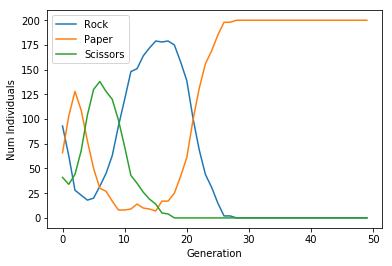

In [44]:
from matplotlib import pyplot
pyplot.plot(np.transpose(rock_paper_scissors))
pyplot.legend(["Rock","Paper","Scissors"])
pyplot.xlabel("Generation")
pyplot.ylabel("Num Individuals")
pyplot.show()

### Why do you think we end up with all Paper after a few generations? 

# For your group homework submission:
## Submit a single Jupyter Notebook or python file containing your implementation of a RPS Strategy, and some markdown or comments describing your approach. 

## Each person should submit a file with the same strategy -- but include a little blurb about what you and others in your group contributed, and what you found interesting and/or struggled with during this assignment. 